# Costos de seguro de salud

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [3]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   str    
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   str    
 5   region    1337 non-null   str    
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.2 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Codificación de variables categóricas (Factorize)
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

# Selección de variables para escalar
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]

# Configuración y aplicación del Min-Max Scaler
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])

# Creación del nuevo DataFrame escalado
df_scal = pd.DataFrame(scal_features, index=df.index, columns=num_variables)

# Reincorporar la variable objetivo (charges) sin escalar
df_scal["charges"] = df["charges"]

# Visualizar resultado
df_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,16884.92400
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,1725.55230
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,4449.46200
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,21984.47061
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,3866.85520


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y objetivo (y)
X = df_scal.drop("charges", axis=1)
y = df_scal["charges"]

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección de las 4 mejores características con f_regression
selection_model = SelectKBest(f_regression, k=4)
selection_model.fit(X_train, y_train)

# Obtener los nombres de las columnas seleccionadas
selected_columns = X_train.columns[selection_model.get_support()]

# Crear DataFrames con las variables seleccionadas
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns, index=X_train.index)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns, index=X_test.index)

# Visualizar las columnas elegidas
print(f"Variables seleccionadas: {list(selected_columns)}")
X_train_sel.head()

Variables seleccionadas: ['age', 'bmi', 'children', 'smoker_n']


,age,bmi,children,smoker_n
1113,0.108696,0.230024,0.0,1.0
967,0.065217,0.263250,0.4,1.0
598,0.739130,0.580172,0.4,1.0
170,0.978261,0.686306,0.0,1.0
275,0.630435,0.286252,0.4,1.0


In [8]:
X_test_sel.head()

,age,bmi,children,smoker_n
899,0.673913,0.176352,0.0,1.0
1063,0.239130,0.259349,0.8,1.0
1255,0.717391,0.549502,0.6,1.0
298,0.282609,0.495830,0.6,0.0
237,0.282609,0.603444,0.4,1.0


In [ ]:
# Unir las variables seleccionadas con la variable objetivo
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values

# Guardar los datasets procesados en la ruta especificada
X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)

print("Archivos guardados exitosamente en ../data/processed/")

Archivos guardados exitosamente en ../data/processed/


# Modelo de regresion lineal

In [10]:
# Cargar los datasets procesados
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

# Verificar la carga
print(f"Tamaño del set de entrenamiento: {train_data.shape}")
print(f"Tamaño del set de prueba: {test_data.shape}")

train_data.head()

Tamaño del set de entrenamiento: (1069, 5)
Tamaño del set de prueba: (268, 5)


,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,2396.09590
1,0.065217,0.263250,0.4,1.0,3279.86855
2,0.739130,0.580172,0.4,1.0,33471.97189
3,0.978261,0.686306,0.0,1.0,13405.39030
4,0.630435,0.286252,0.4,1.0,9715.84100


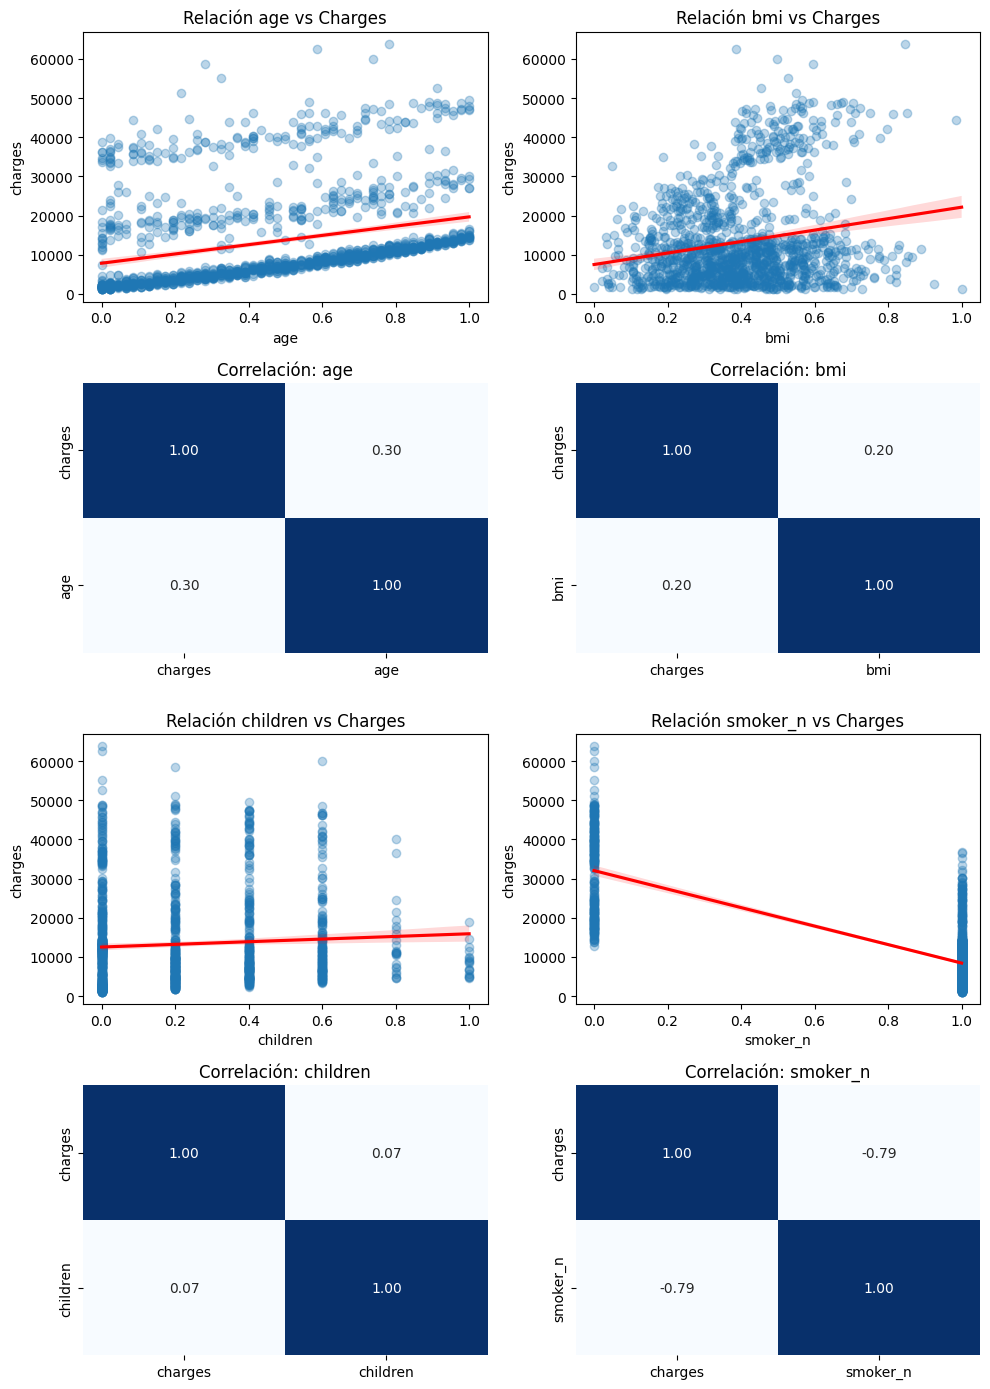

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combinar los datos para la visualización global
total_data = pd.concat([train_data, test_data])

# Configurar la cuadrícula de gráficos
fig, axis = plt.subplots(4, 2, figsize=(10, 14))

# Lista de variables presentes en tu dataframe (excluyendo 'charges')
# Esto asegura que solo grafique lo que realmente existe en tus archivos procesados
features = [col for col in total_data.columns if col != "charges"]

# Generar los gráficos dinámicamente o mantener tu estructura fija
# Nota: He mantenido tu estructura original pero asegurando que las variables existan
for i, var in enumerate(features[:4]): # Tomamos las 4 variables seleccionadas
    # Regresión (Fila 0 y 2)
    row_reg = 0 if i < 2 else 2
    col_reg = i % 2
    sns.regplot(data=total_data, x=var, y="charges", ax=axis[row_reg, col_reg], 
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axis[row_reg, col_reg].set_title(f"Relación {var} vs Charges")
    
    # Heatmap de correlación (Fila 1 y 3)
    row_heat = 1 if i < 2 else 3
    col_heat = i % 2
    sns.heatmap(total_data[["charges", var]].corr(), annot=True, fmt=".2f", 
                ax=axis[row_heat, col_heat], cbar=False, cmap="Blues")
    axis[row_heat, col_heat].set_title(f"Correlación: {var}")

plt.tight_layout()
plt.show()

In [ ]:
# Separar características y variable objetivo para el entrenamiento
X_train = train_data.drop(["charges"], axis=1)
y_train = train_data["charges"]

# Separar características y variable objetivo para la prueba
X_test = test_data.drop(["charges"], axis=1)
y_test = test_data["charges"]

# Verificación rápida de dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1069, 4), y_train: (1069,)
X_test: (268, 4), y_test: (268,)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 21143.269121973935
Coefficients (b1, b2): [ 11462.79943201  11346.78939471   2689.8609795  -23042.50723793]


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
y_pred

array([ 7826.71976716,  5936.53265111, 14173.07782788, 31622.75075546,
        9263.34093635, 13480.14887712, 29787.25790395,  1643.45719872,
       10876.17888434, 11325.66257258, 10382.00922092, 33095.82145191,
       30563.99442887, 17375.68543919, 10170.05222026,  9793.97788271,
        4338.87322262, 32040.02942064,  3533.00631632,  5540.63300408,
        3800.90102672, 29849.73579925, 15058.38135413, 30681.25821127,
       30855.22159196,  5318.35517484, 35651.38184556, 36750.00646392,
       10887.72705446, 13731.47292098,  5951.31281261, 13057.0503156 ,
         885.50217102, 12378.3628904 , 39714.81547966, 12430.12415904,
        4898.39413804,  3922.99091642, 31372.98531615,  9306.77316642,
        6376.62829275, 29696.01315781, 35095.36875728, 11850.11609205,
        7372.07939253,  3596.50605624,  5524.8651415 ,  9123.94398722,
        4175.68935164,  9410.0034801 ,  6870.37575452, 11482.89235724,
       30753.06314612,  3901.63926993, 11213.80257282, 10152.26872403,
      

In [26]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

# Comparativa rápida (Primeros 5 valores)
comparison_df = pd.DataFrame({'Real': y_test.values, 'Predicción': y_pred})
print("\nComparativa Real vs Predicción:")
print(comparison_df.head())

Error Cuadrático Medio (MSE): 35914551.48
Coeficiente de determinación (R²): 0.8046

Comparativa Real vs Predicción:
          Real    Predicción
0   8688.85885   7826.719767
1   5708.86700   5936.532651
2  11436.73815  14173.077828
3  38746.35510  31622.750755
4   4463.20510   9263.340936


In [ ]:
import numpy as np

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Raíz cuadrada del MSE
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del MSE): {rmse:.2f}")
print(f"R2 Score (Coeficiente de Determinación): {r2:.4f}")

MSE (Error Cuadrático Medio): 35914551.48
RMSE (Raíz del MSE): 5992.88
R2 Score (Coeficiente de Determinación): 0.8046
